# 07140147 José Luis Hernández
##  Tarea 01

###  librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Datasets

In [24]:
dataset1 = pd.read_csv('https://podaac-tools.jpl.nasa.gov/drive/files/allData/gracefo/docs/GRACE_GRACE-FO_Months_RL06.csv')
dataset1.head(2)


,Month Sr No,GRACE/GRACE-FO record index,MONTH,YEAR,START DAY,YEAR.1,END DAY,COMMON MISSING DAYS,CSR unused days,GFZ unused days,JPL unused days
0,1,1.0,APR,2002,91,2002,120,"91-93, 100,101,118",NaN,117,NaN
1,2,2.0,MAY,2002,121,2002,151,"121, 128, 134, 139-151",127,127,NaN


In [16]:
dataset2 = pd.read_csv('https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv')
dataset2.head(2)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"


In [17]:
dataset3 = pd.read_csv('https://data.wprdc.org/dataset/669b2409-bb4b-46e5-9d91-c36876b58a17/resource/e919ecd3-bb11-4883-a041-bded25dc651c/download/cveu-inspections-all-years-2019-fixed.csv')
dataset3.head(2)

,Date,Intersection,City,State,Inspection #,Level,OOS-TR,OOS-TL,OOS-DR,Crash,Weighed,# of Violations,Total Fines,Inspector
0,2027-02-16,GRAND AVE & HUBERT ST,NEVILLE ISLAND,PA,PAM637000204,1,Y,NaN,NaN,NaN,NaN,6.0,204.0,INSPECTOR 3
1,2018-12-28,GRAND AVE & HUBERT ST,NEVILLE ISLAND,PA,PAM584000612,1,NaN,NaN,NaN,NaN,NaN,1.0,0.0,INSPECTOR 2


In [18]:
dataset4 = pd.read_csv('https://data.cityofnewyork.us/api/views/7kc8-z939/rows.csv')
dataset4.head(2)

,Agency,"""At FCRC"" in FY 2015 (Yes/No)",FY 2015 Registration (Yes/No),Registration Date (or date sent to Comptroller for registration),$ Value for FY2015 Registrations,"DOC_CD (e.g., ""RCT1"")",DOC (agency code),DOC_ID (automatically generated contract ID number from FMS),Concession ID (pre-registration),Concessionaire,Concession Type (specific category),Concession Type (general category),Solicitation/Award Method,Start Date,Expiration Date,Revenue Collected in FY 2015,Brief Description of Concession,Borough
0,DCAS,No,No,2007,NaN,RCT1,856.0,2.007004e+10,NaN,James Miller Marina,Maritime Occupancy Permit,Occupancy/Parking Lot/ Other,Sole Source,4/1/2007,3/31/2010,36900.0,Concession property is currently used for no o...,Staten Island
1,DCAS,No,No,10/16/2006,NaN,RCT1,856.0,2.007002e+10,NaN,Dircksen & Talleyrand,Non-Maritime Occupancy Permit,Occupancy/Parking Lot/ Other,Sole Source,7/1/2006,6/30/2009,6120.0,DCAS concession property is used for no other ...,Brooklyn


## Funciones

In [20]:
##  imputacion media y mediana

## calculo media y rellenado de valores nulos
def ImpMeanV(df,x):
    mv = np.round(df.iloc[:,x].mean(),0)
    return(df.iloc[:,x].fillna(mv))

## calculo mediana y rellenado de valores nulos
def ImpMedianV(df,x):
    mv = np.round(df.iloc[:,x].median(),0)
    return(df.iloc[:,x].fillna(mv))

## graficado de dispersion de valores
def plt_dns_df(df,x):
    df_mean = ImpMeanV(df, x)
    df_median = ImpMedianV(df, x)
    fig = plt.figure()
    fig.add_subplot(111)
    df.iloc[:,x].plot.density(color = 'red')
    df_mean.plot.density(color = 'blue')
    df_median.plot.density(color = 'green')

## aplicacion de correlacion en relacion de la columna a imputar y la columna targe (precio, revenue etc)
def corr_df(df,x,df2,z):
    df_mean = ImpMeanV(df, x)
    df_median = ImpMedianV(df, x)     
    return(np.corrcoef(df_mean, df2.iloc[:,z]))
    return(np.corrcoef(df_median, df2.iloc[:,z]))

## relleno de valores nulos con la media de los datasets
def FillNaN_df(df,x):
    df_mean = ImpMeanV(df, x)
    df.iloc[:,x]= df.iloc[:,x].fillna(df_mean)

# Ejecuciones

## Ejecución Dataset 1


In [26]:
## validacion valores nulos
dataset1.iloc[:,1].isnull().sum()

33

In [27]:
## imputacion media y mediana
ImpMeanV(dataset1, 1)
ImpMedianV(dataset1, 1)

0        1.0
1        2.0
2      102.0
3      102.0
4        3.0
       ...  
232    200.0
233    201.0
234    202.0
235    203.0
236    204.0
Name: GRACE/GRACE-FO record index, Length: 237, dtype: float64

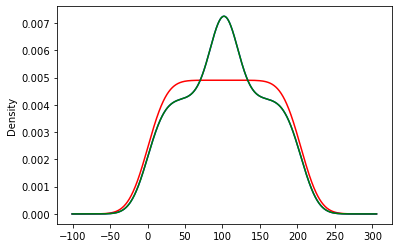

In [28]:
##  grafica de dispercion
plt_dns_df(dataset1, 1)  

In [ ]:
## corrrelacion 
corr_df(dataset1, 1, dataset1, 6)

In [30]:
## reemplazo valores nulos por la media
FillNaN_df(dataset1, 1)   

In [31]:
## validacion  final 
dataset1.iloc[:,1].isnull().sum()

0

## Ejecución Dataset 2

In [32]:
## validacion valores nulos
dataset2.iloc[:,4].isnull().sum()

131

In [33]:
## imputacion media y media
ImpMeanV(dataset2, 4)
ImpMedianV(dataset2, 4)

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass (g), Length: 45716, dtype: float64

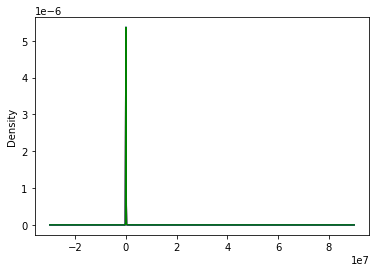

In [34]:
## grafica dispersion
plt_dns_df(dataset2, 4)    

In [ ]:
## correlacion
corr_df(dataset2, 4, dataset2, 7)

In [36]:
## Reemplazo valores nulos por la media
FillNaN_df(dataset2, 4)    

In [37]:
## validacion final
dataset2.iloc[:,4].isnull().sum()

0

## Ejecución dataset 3

In [38]:
# validacion valores nulos
dataset3.iloc[:,11].isnull().sum()

260

In [39]:
# imputacion media y mediana
ImpMeanV(dataset3, 11)
ImpMedianV(dataset3, 11)

0        6.0
1        1.0
2        4.0
3        0.0
4        5.0
        ... 
2558     0.0
2559     0.0
2560    25.0
2561     0.0
2562     4.0
Name: # of Violations, Length: 2563, dtype: float64

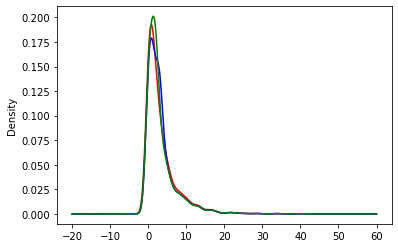

In [40]:
## graficado de dispercion
plt_dns_df(dataset3, 11)   

In [ ]:
## correlacion
corr_df(dataset3, 11, dataset3, 12)

In [42]:
## reemplazo de valores nulor por media
FillNaN_df(dataset3, 11)

In [43]:
## validacion final
dataset3.iloc[:,11].isnull().sum()

0

## Ejecucíon dataset 4

In [44]:
## validacion valeres nulos
dataset4.iloc[:,6].isnull().sum()

2

In [45]:
## imputacion media y mediana
ImpMeanV(dataset4, 6)
ImpMedianV(dataset4, 6)

0      856.0
1      856.0
2      856.0
3      856.0
4      856.0
       ...  
509    801.0
510    801.0
511    801.0
512     56.0
513     56.0
Name: DOC (agency code), Length: 514, dtype: float64

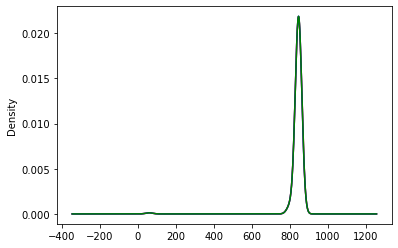

In [46]:
## graficas de dispercion 
plt_dns_df(dataset4, 6)   

In [ ]:
## correlacion
corr_df(dataset4, 6, dataset4, 15)

In [48]:
## reemplazo de valores nulos
FillNaN_df(dataset4, 6)

In [49]:
## validacion final
dataset4.iloc[:,6].isnull().sum()

0